# 대중교통

1. 유임승차 비율이 가장 높은 곳을 찾는다.  
- 유임 승차의 비율 = 유임승차인원 / 무임승차인원  -> 유임 승차 인원/(유임+무임) 인원  
    충무로의 경우 유무임 승차 값이 0이어서 다른 계산 방식 적용

In [31]:
# 첫번째 계산 방식
import csv

f = open('subwayfee.csv')
data = csv.reader(f)

print(next(data)) # 반복 가능한 객체에서  다음 값을 출력


['사용월', '호선명', '역ID', '지하철역', '유임승차', '유임하차', '무임승차', '무임하차']


In [2]:
# 첫번째 계산 방식
mx = 0
rate = 0

for row in data:
    for i in range(4,8): 
        row[i] = int(row[i].replace(',',""))

    if row[6] != 0 :
        rate = row[4]/row[6]

        if rate > mx :
            mx = rate
            print(row, round(rate,2))

print(mx)

['Nov-21', '1호선', '1', '서울역', 1086374, 1044750, 180495, 170842] 6.02
['Nov-21', '1호선', '2', '시청', 516353, 528021, 72373, 72182] 7.13
['Nov-21', '2호선', '11', '시청', 547821, 531320, 49350, 45066] 11.1
['Nov-21', '2호선', '19', '한양대', 219942, 236092, 11741, 12338] 18.73
['Nov-21', '3호선', '73', '충무로', 33, 0, 1, 0] 33.0
33.0


In [4]:
#변경된 계산 방식
mx = 0
rate = 0
max_station = ''

for row in data:
    for i in range(4,8): 
        row[i] = int(row[i].replace(',',""))

    if row[6] != 0 and (row[4]+row[6] > 100000):
        rate = row[4] / (row[4]+row[6])

        if rate > mx :
            mx = rate
            max_station = row[3] + ' ' + row[1]
            
print(max_station , round(mx*100,2))

한양대 2호선 94.93


2. 유무임 승하차 인원이 가장 많은 역  
  
인원수, 승하차 역을 나타내는 공간 mx, max_station 4개 사용    
각각의 인원에 대하여 가장 수가 큰 역을 찾는다.

In [8]:
mx = [0]*4
max_station = ['']*4

print(mx)
print(max_station)

[0, 0, 0, 0]
['', '', '', '']


In [9]:
for row in data:
    for i in range(4,8): 
        row[i] = int(row[i].replace(',',""))
        
        if row[i] > mx[i-4]:
            mx[i-4] = row[i]
            max_station[i-4] = row[3] + ' ' + row[1]
            
print(mx)
print(max_station)

[2068581, 2106836, 272242, 263992]
['강남 2호선', '강남 2호선', '종로3가 1호선', '제기동 1호선']


3. 서울역의 유무임 승하차 비율

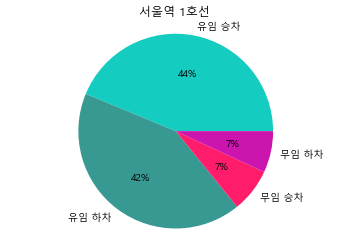

In [32]:
import matplotlib.pyplot as plt

label = ['유임 승차', '유임 하차','무임 승차','무임 하차']
c = ['#14CCC0','#389993','#FF1C6A','#CC14AF']
plt.rc('font',family='Malgun Gothic')

row = next(data)

for i in range(4,8):
    row[i] = int(row[i].replace(',',""))
    
plt.title(row[3] + ' ' + row[1])
plt.pie(row[4:8],labels=label, colors =c, autopct='%1.f%%')
plt.axis('equal')
plt.show()
    
            

- 지하철 시간개별 이용현황


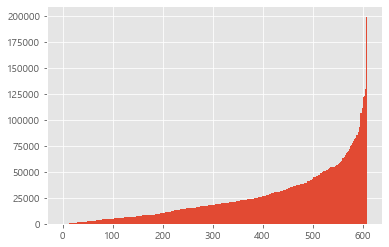

In [82]:
time_f = open('subwaytime.csv')
data = csv.reader(time_f)

next(data)
next(data)

result = []

for row in data:
    row[4:] = map(lambda x:int(x.replace(",","")), row[4:])
    result.append(row[10]) # 오전 7시 승차인원

result.sort()
plt.style.use('ggplot')
plt.bar(range(len(result)), result)
plt.show()



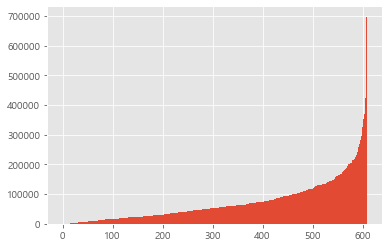

In [83]:
time_f = open('subwaytime.csv')
data = csv.reader(time_f)

next(data)
next(data)

result = []

for row in data:
    row[4:] = map(lambda x:int(x.replace(",","")), row[4:])
    result.append(sum(row[10:15:2])) # 오전 7-9시 승차인원

result.sort()
plt.bar(range(len(result)), result)
plt.show()


- 출근 시간에 가장 많은 승차 인원이 있는 역은?

In [84]:
time_f = open('subwaytime.csv')
data = csv.reader(time_f)

next(data)
next(data)

mx = 0 
mx_station = ''

for row in data:
    row[4:] = map(lambda x:int(x.replace(",","")), row[4:])
    if sum(row[10:15:2]) > mx:# 오전 7-9시 승차인원
        mx = sum(row[10:15:2])
        mx_station = row[3] + ' ' + row[1]
        
print(mx_station , mx)

신림 2호선 697158


- 출근 시간 가장 많은 하차 인원이 있는 역은?

In [86]:
time_f = open('subwaytime.csv')
data = csv.reader(time_f)

next(data)
next(data)

mx = 0 
mx_station = ''

for row in data:
    row[4:] = map(lambda x:int(x.replace(",","")), row[4:])
    if sum(row[10:15:2]) > mx:# 오전 7-9시 승차인원
        mx = sum(row[11:16:2])
        mx_station = row[3] + ' ' + row[1]
        
print(mx_station , mx)

구로디지털단지 2호선 490785


- 밤 11시 사람들이 가장 많이 타는 역  
승차 시각과 인덱스 사이 관계식 : i = 4+ (t-4)*2

In [87]:
time_f = open('subwaytime.csv')
data = csv.reader(time_f)

next(data)
next(data)

mx = 0 
mx_station = ''

for row in data:
    row[4:] = map(lambda x:int(x.replace(",","")), row[4:])
    a = row[18]
    if a > mx:
        mx = a
        mx_station = row[3] + ' ' + row[1]
print(mx_station , mx)

신림 2호선 77218
